# Assignment 2
**Ecommerce_UK_Retailer_Data_Analysis**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv("A:\Python\Python_Asgn_2\Ecommerce - UK Retailer.csv", encoding = "latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df = df.drop(['Description'], axis = 1)
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df["CustomerID"].mode()[0]

17841.0

In [11]:
df["CustomerID"].fillna(df["CustomerID"].mode()[0], inplace = True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3. Remove duplicate rows

In [12]:
df.duplicated().sum()

5270

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(536639, 7)

In [15]:
df.duplicated().sum()

0

### 4. Remove rows which have negative values in Quantity column

In [16]:
df_new = df[(df['Quantity'] >= 0)]

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526052 non-null  object 
 1   StockCode    526052 non-null  object 
 2   Quantity     526052 non-null  int64  
 3   InvoiceDate  526052 non-null  object 
 4   UnitPrice    526052 non-null  float64
 5   CustomerID   526052 non-null  float64
 6   Country      526052 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.1+ MB


### 5. Add the columns - Month, Day and Hour for the invoice

In [18]:
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


### 6. How many orders made by the customers?

In [19]:
index = pd.Index(df_new['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 526052


In [20]:
total_order=df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          1
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         85
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59


### 7. TOP 5 customers with higher number of orders

In [21]:
print('TOP 5 customers with higher number of orders :- ')
total_order.sort_values(by='InvoiceNo', ascending=False).head()

TOP 5 customers with higher number of orders :- 


,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,85
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


### 8. How much money spent by the customers?

In [22]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Revenue'].sum()
money_spent

,CustomerID,Country,Revenue
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1797.24
3,12349.0,Italy,1757.55
4,12350.0,Norway,334.40
...,...,...,...
4350,18280.0,United Kingdom,180.60
4351,18281.0,United Kingdom,80.82
4352,18282.0,United Kingdom,178.05
4353,18283.0,United Kingdom,2045.53


### 9. TOP 5 customers with highest money spent

In [23]:
money_spent.sort_values(by='Revenue', ascending=False).head()

,CustomerID,Country,Revenue
4026,17841.0,United Kingdom,1.735115e+06
1698,14646.0,Netherlands,2.802060e+05
4218,18102.0,United Kingdom,2.596573e+05
3737,17450.0,United Kingdom,1.943908e+05
3017,16446.0,United Kingdom,1.684725e+05


### 1. Perform Basic EDA
#### a. Boxplot – All Numeric Variables

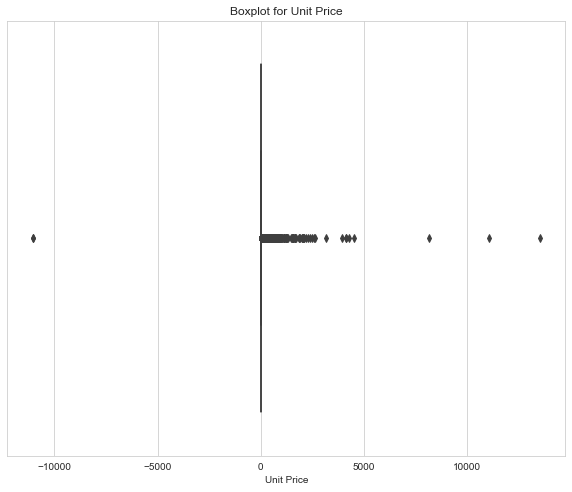

In [24]:
plt.subplots(figsize=(10,8))
sns.boxplot(df_new.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Boxplot for Unit Price')
plt.show()

#### b. Histogram – All Numeric Variables

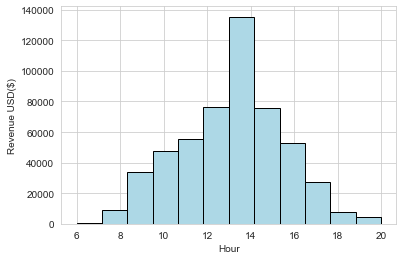

In [25]:
plt.hist(df_new['Hour'],color='lightblue', edgecolor='black',bins=12)
sns.set_style("darkgrid")
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

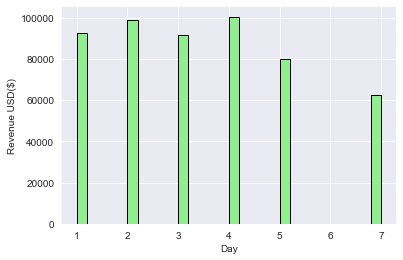

In [26]:
plt.hist(df_new['Day'],color='lightgreen', edgecolor='black',bins=30)
sns.set_style('darkgrid')
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

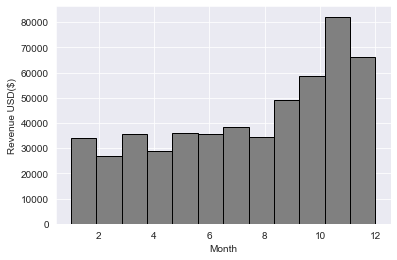

In [27]:
plt.hist(df_new['Month'],color='grey', edgecolor='black',bins=12)
sns.set_style('darkgrid')
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

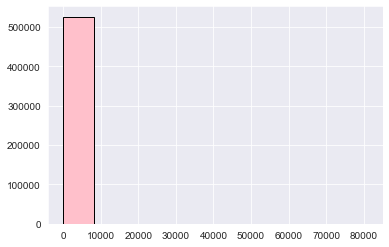

In [28]:
plt.hist(df_new['Quantity'],color='pink', edgecolor='black')
plt.show()

#### c. Distribution Plot – All Numeric Variables

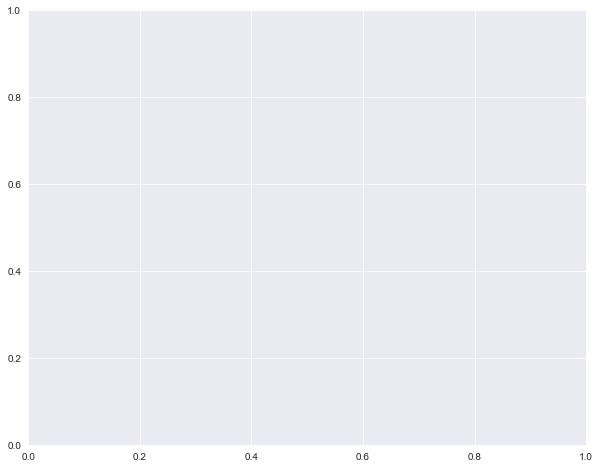

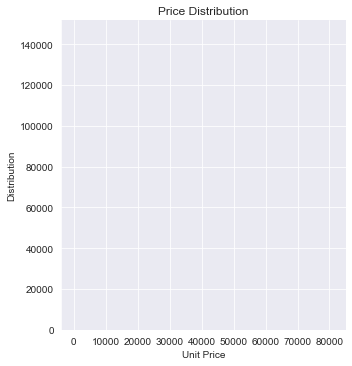

In [29]:
plt.subplots(figsize =(10,8))
sns.displot(df_new.Quantity,label="UnitPrice")
plt.xlabel("Unit Price")
plt.ylabel("Distribution")
plt.title("Price Distribution")
plt.show() 

#### d. Aggregation for all numerical Columns

In [30]:
df_new.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Revenue
count,526052.000000,526052.000000,526052.000000,526052.000000,526052.000000,526052.000000,526052.000000,526052.000000,526052.000000
mean,10.730338,3.871749,15934.840347,2010.921696,7.551877,201099.721472,3.428085,13.074637,20.187044
std,157.591632,42.016640,1850.835664,0.268650,3.508392,25.775455,1.844957,2.442556,272.249885
min,1.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-11062.060000
25%,1.000000,1.250000,14382.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,3.900000
50%,4.000000,2.080000,16279.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.920000
75%,11.000000,4.130000,17841.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.700000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.600000


#### e. Unique Values across all columns

In [31]:
pd.unique(df_new[["Country","StockCode"]].values.ravel())

array(['United Kingdom', '85123A', '71053', ..., '90214U', '47591b',
       '23843'], dtype=object)

#### f. Duplicate values across all columns

In [32]:
df_new.duplicated().sum()

0

#### g. Correlation – Heatmap - All Numeric Variables

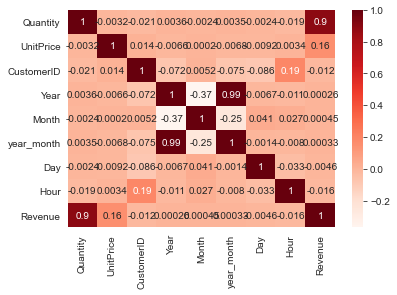

In [33]:
sns.heatmap(df_new.corr(),annot=True,cmap='Reds')
plt.show()

#### h. Regression Plot - All Numeric Variables

In [34]:
#plt.subplots(figsize=(10,8))
#sns.regplot(x='Month', y='Revenue',data=df_new)
#plt.show()

#### i. Bar Plot – Every Categorical Variable vs every Numerical Variabl

In [35]:
# plt.subplots(figsize = (10,7))
# sns.barplot(x = "Month", y ="Revenue", data= df_new)
# plt.xlabel("MONTHS")
# plt.ylabel("Revenue")
# plt.title("Monthly Sales")
# plt.show()

#### j. Pair plot - All Numeric Variables

In [36]:
#sns.pairplot(df_new,vars=["Quantity","UnitPrice","Revenue","Month","Day"])
#plt.show()

#### k. Line chart to show the trend of data - All Numeric/Date Variables

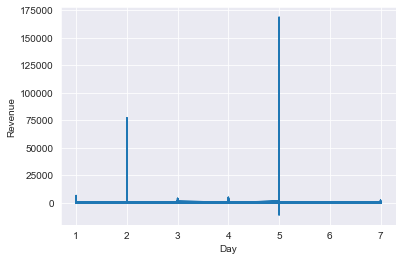

In [37]:
plt.plot(df_new["Day"],df_new["Revenue"])
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

#### l. Plot the skewness - All Numeric Variables

In [38]:
df_new.skew(axis=0,skipna=True)

Quantity      458.002944
UnitPrice      60.256569
CustomerID     -0.408367
Year           -3.139386
Month          -0.414170
year_month     -3.051223
Day             0.468673
Hour           -0.002374
Revenue       499.773896
dtype: float64

In [39]:
df_new.skew(axis=1,skipna=True)

0         2.957284
1         2.957288
2         2.957290
3         2.957288
4         2.957288
            ...   
541904    2.978223
541905    2.978222
541906    2.978224
541907    2.978224
541908    2.978223
Length: 526052, dtype: float64

### 10. How many orders per month?

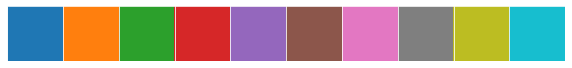

In [40]:
sns.palplot(color)

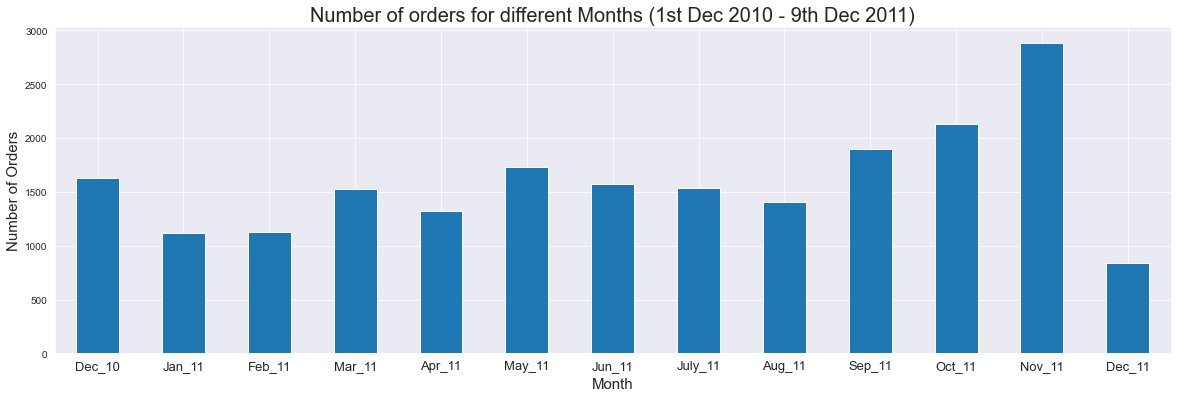

In [41]:
ax = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

### 11. How many orders per day?

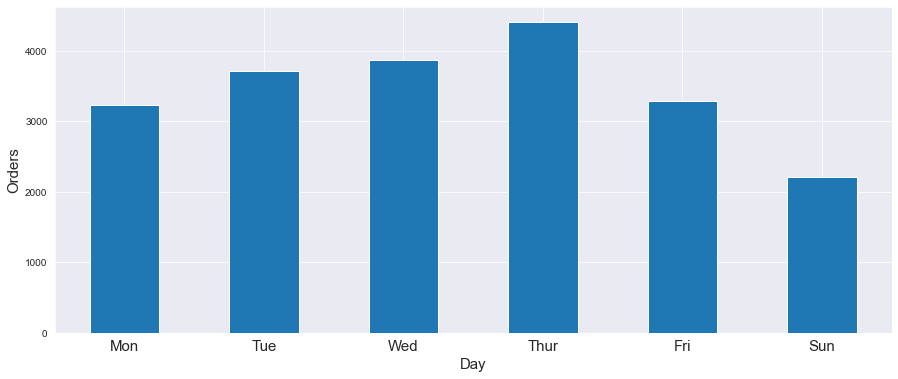

In [42]:
ax = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Orders',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

### 12. How many orders per hour?

In [43]:
ph=pd.pivot_table(df_new, index = 'Hour' , values = 'Quantity', aggfunc = "count").head(20)
print(ph)

      Quantity
Hour          
6            1
7          379
8         8802
9        33738
10       47670
11       55591
12       76096
13       70066
14       65384
15       75851
16       53074
17       27498
18        7696
19        3428
20         778


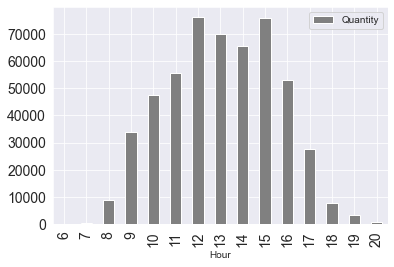

In [44]:
ph.plot(kind='bar', fontsize=14,color='grey')
plt.show()

### 13. How many orders for each country?

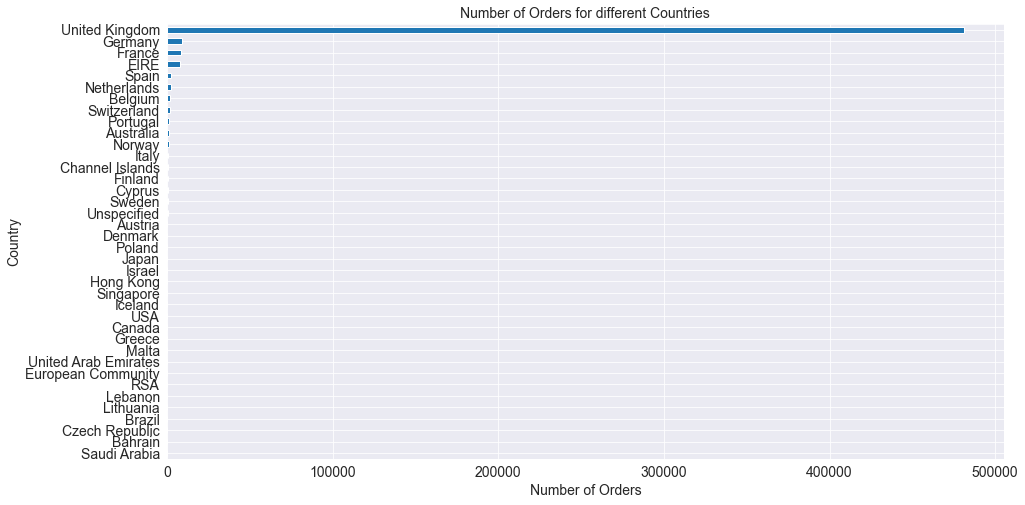

In [45]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

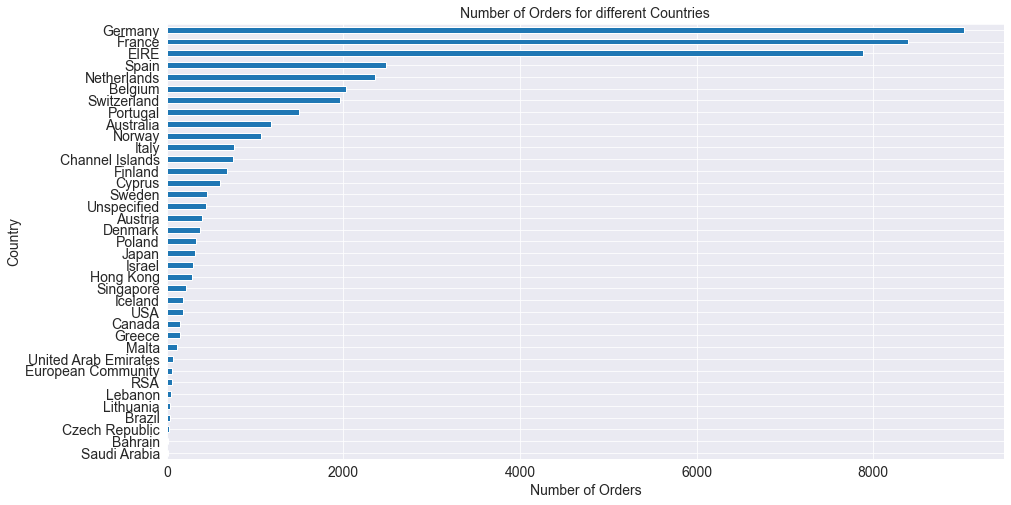

In [46]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()
# number of unique customers in each country (without UK)

### 14. Orders trend across months

### 15. How much money spent by each country?

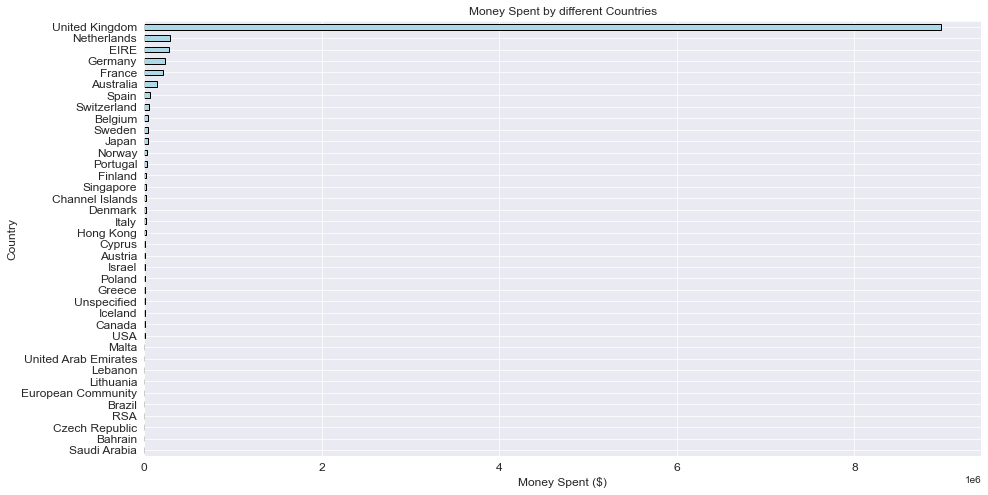

In [49]:
OC2 = df_new.groupby('Country')['Revenue'].sum().sort_values()

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
OC2.plot(kind='barh', fontsize=12, color='lightblue',edgecolor='black')
plt.xlabel('Money Spent ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

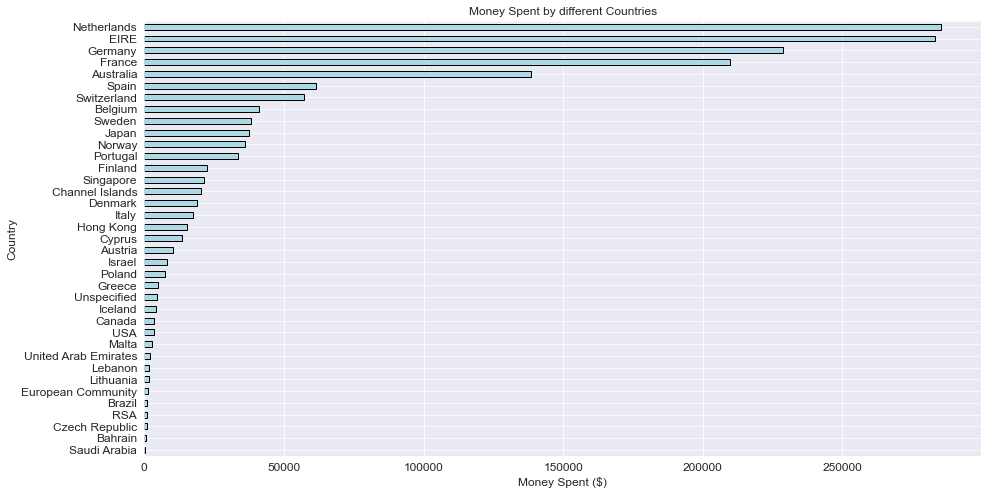

In [48]:
OC2 = df_new.groupby('Country')['Revenue'].sum().sort_values()
del OC2['United Kingdom']
# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
OC2.plot(kind='barh', fontsize=12, color='lightblue',edgecolor='black')
plt.xlabel('Money Spent ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()